In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data_file_name = 'AB_NYC_2019.csv'

In [3]:
data_frame = pd.read_csv(data_file_name)

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
data_frame.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data_frame.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
data_frame = data_frame.drop(['name', 'id', 'host_id', 'host_name', 'last_review'], axis=1)

In [8]:
data_frame.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

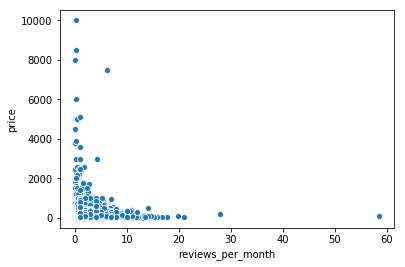

In [9]:
sns.scatterplot(data=data_frame, x='reviews_per_month', y='price')

___
# Параметр reviews_per_month имеет много пропущенных значений (20% - каждое пятое), при этом очень слабо коррелирован с целевой переменной.  При построении модели регрессии можно его не учитывать.
___

In [10]:
data_frame = data_frame.drop('reviews_per_month', axis=1)

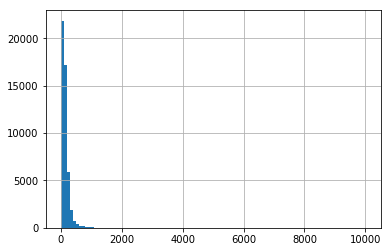

In [11]:
data_frame.price.hist(bins=100)

___
# В распределени целевой переменной присутствуют нулевые значения.  Это не позволяет напрямую использовать сжатие дапазона значений логарифмированием.
# При этом разброс значений очень велик. Возможно, есть смысл построить модель классификации квартир на платные/бесплатные, а цену предсказывать для квартир, классифицрованных как платные.
# Посмотри, много ли записей с нулевой ценой...
___

In [12]:
data_frame.loc[data_frame.price == 0, 'price'].count()

11

___
# Без ущерба для точности модели можно отбросить 11 из 50000 записей с нулевой ценой и применить логарифмирование.
___

In [13]:
data_frame = data_frame[data_frame.price != 0]

In [14]:
data_frame['price'] = np.log(data_frame['price'])

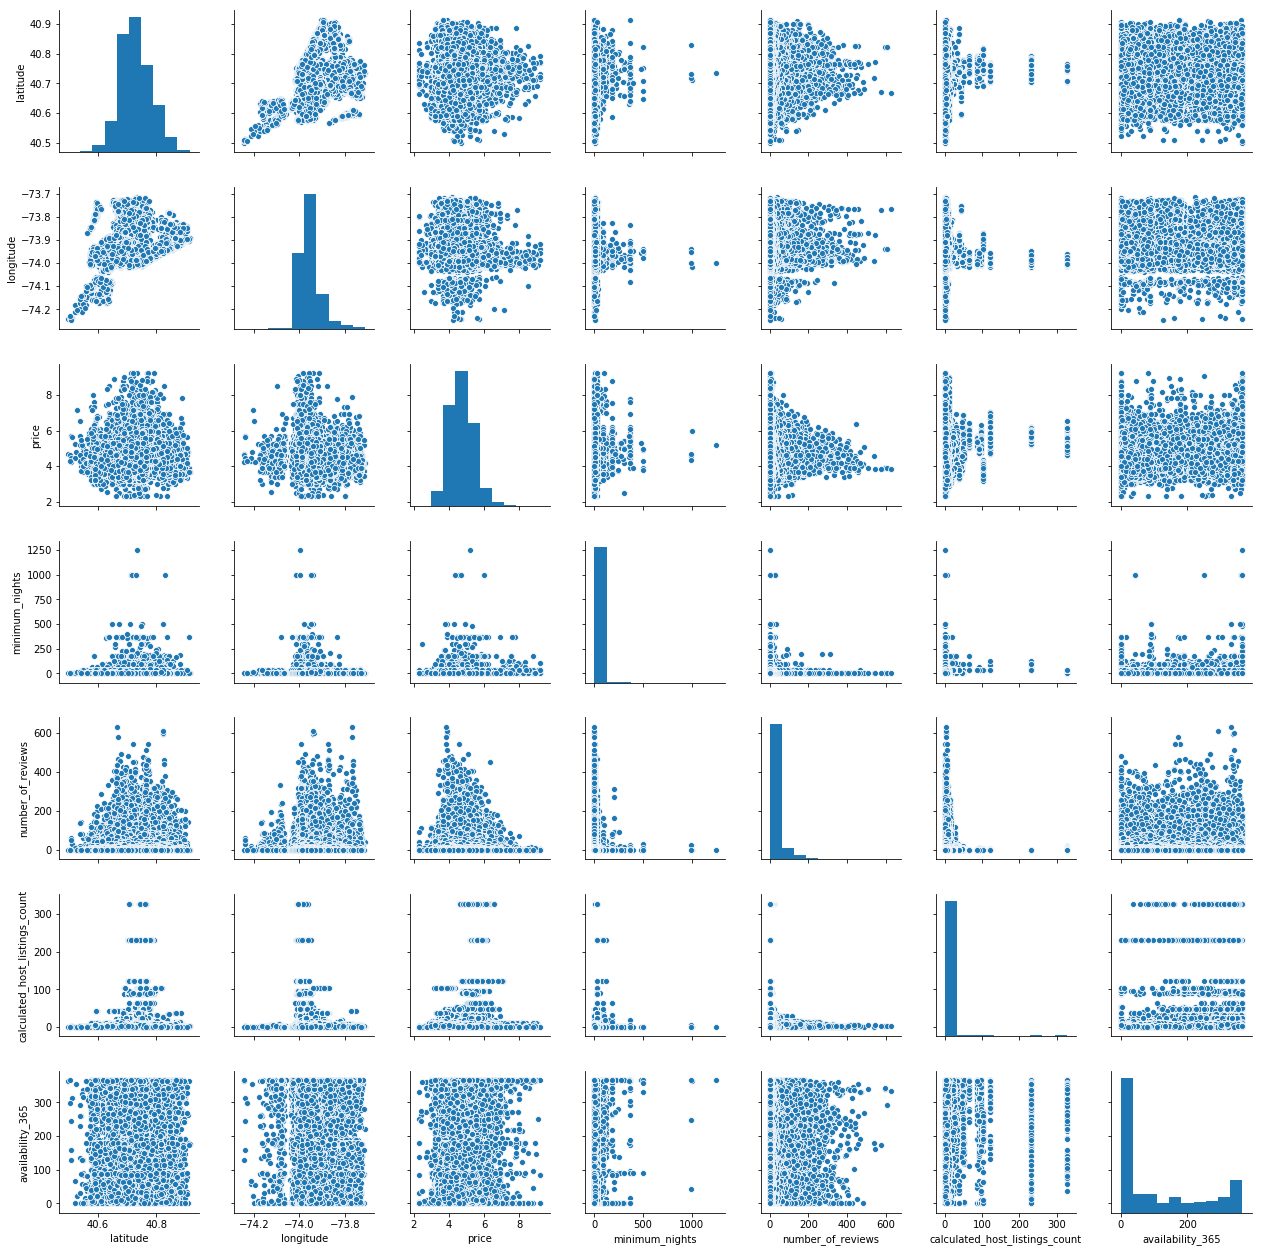

In [15]:
sns.pairplot(data_frame)

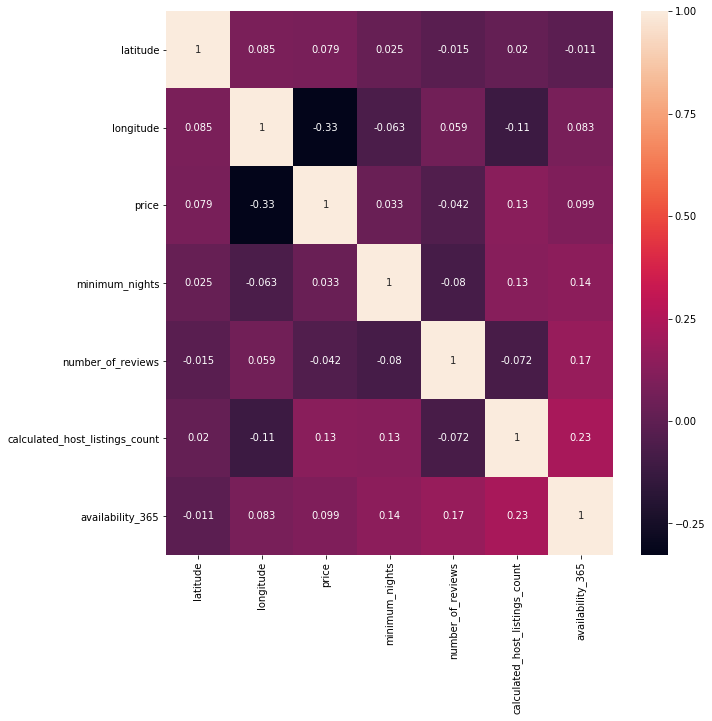

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data_frame.corr(), annot=True);

___
# В целом, наблюдается очень слабая корреляция количественных параметров между собой и с целевой переменной.
___

In [17]:
from scipy import stats

In [18]:
data_frame['neighbourhood'].nunique()

221

In [19]:
data_frame['neighbourhood_group'].nunique()

5

___
# Среди параметров есть категориальные - neighbourhood_group, neighbourhood, room_type. Для построения модели регрессии их нужно перекодировать в индикаторные.  
# Параметр neighbourhood и neighbourhood_group несут ту же информацию, что и географические координаты. Кроме того, после перекодирования они порождают огромное количество новых параметров (226), что приводит к бессмысленным результатам линейной регрессии.  
# Исключим эти данные из набора.
___

In [20]:
neighbour_group = pd.get_dummies(data_frame['neighbourhood_group'], drop_first=True, prefix='group')
neighbourhood = pd.get_dummies(data_frame['neighbourhood'], drop_first=True, prefix='neighbourhood')
room_type = pd.get_dummies(data_frame['room_type'], drop_first=True, prefix='room_type')

In [21]:
#data_frame = pd.concat([data_frame.drop('neighbourhood_group',axis=1),neighbour_group], axis=1)
#data_frame = pd.concat([data_frame.drop('neighbourhood',axis=1),neighbourhood], axis=1)
data_frame = pd.concat([data_frame.drop('room_type',axis=1),room_type], axis=1)

data_frame = data_frame.drop('neighbourhood_group',axis=1)
data_frame = data_frame.drop('neighbourhood',axis=1)
#data_frame = data_frame.drop('room_type',axis=1)

data_frame.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,5.003946,1,9,6,365,1,0
1,40.75362,-73.98377,5.416100,1,45,2,355,0,0
2,40.80902,-73.94190,5.010635,3,0,1,365,1,0
3,40.68514,-73.95976,4.488636,1,270,1,194,0,0
4,40.79851,-73.94399,4.382027,10,9,1,0,0,0


___
# Делим набор данных на тренировочные и тестовые. Шкалируем значения количественных параметров.
___

In [22]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_frame, test_size = 0.3)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
pd.options.mode.chained_assignment = None
scaled_train_data = scaler.transform(train_data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])
scaled_test_data = scaler.transform(test_data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])

In [25]:
train_data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = scaled_train_data
test_data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = scaled_test_data

In [26]:
print(train_data.shape)
print(test_data.shape) 

(34218, 9)
(14666, 9)


In [27]:
y_train = train_data.price 
y_test = test_data.price 

X_train = train_data.drop('price', axis=1).get_values()
X_test = test_data.drop('price', axis=1).get_values()

In [28]:
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
simple_model = LinearRegression()

simple_model.fit(X_train, y_train)
y_pred_simple = simple_model.predict(X_test)

In [31]:
print_metrics(y_test,y_pred_simple)

MAE: 64.50792320617255
RMSE: 226.59265976141162
R2: 0.46182103892414694
MAPE: 7.879380060990927


In [32]:
y_mean = np.ones(len(y_test)) * np.mean(y_train)

In [33]:
print_metrics(y_test,y_mean)

MAE: 84.61202351538165
RMSE: 239.71473635979672
R2: -0.0001524469889802038
MAPE: 11.891190740159333


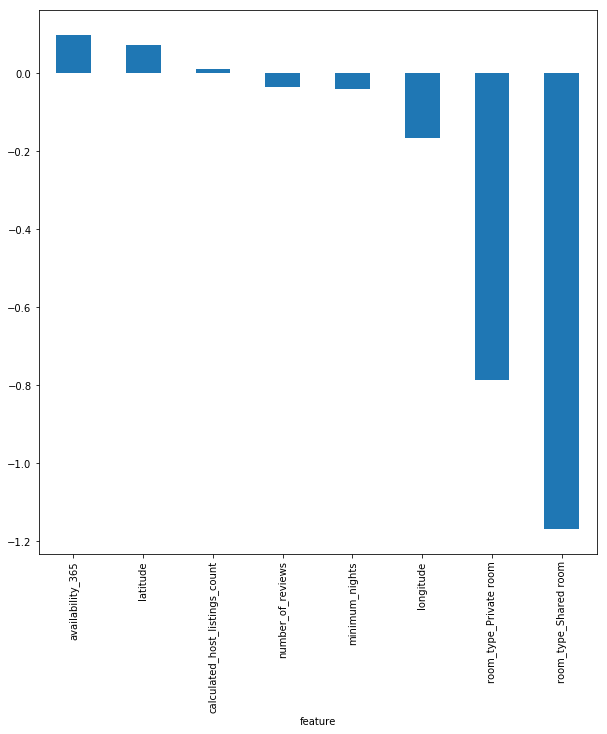

In [34]:
feature_importance = pd.DataFrame({"feature": data_frame.drop('price',axis=1).columns, 
                                  "importance": simple_model.coef_})

feature_importance.set_index('feature', inplace=True)
feature_importance.sort_values(["importance"], ascending=False, inplace=True)
feature_importance["importance"].plot('bar', figsize=(10, 10));

___
# Выводы по величинам коэффициентов линейной регрессии:  
# доступность комнаты (availability_365) и географическая широта увеличивают стоимость аренды (чем севернее, тем дороже),
# географическая долгота уменьшает стоимость аренды (чем восточнее, тем дешевле),
# комнаты, предполагающие совместное проживание (shared) стоят дешевле индивидуальных (private) комнат.  
# Остальные параметры значительного влияния на цену не оказывают.
___

In [35]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

In [36]:
print_metrics(y_test,y_pred_lasso)

MAE: 84.61202351538186
RMSE: 239.71473635979584
R2: -0.0001524469889786495
MAPE: 11.891190740159491


___
# Без подстройки параметров метрики точности lasso-регрессии совпадают с точностью простейшего "предсказания" по среднему значению цены.  
# Улучшим точность предсказания, подобрав параметры аогоритма:
___

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.5, 0.8, 1, 5, 10]}

grid_lasso_model = Lasso() 

grid_cv_lasso = GridSearchCV(grid_lasso_model, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.0001}


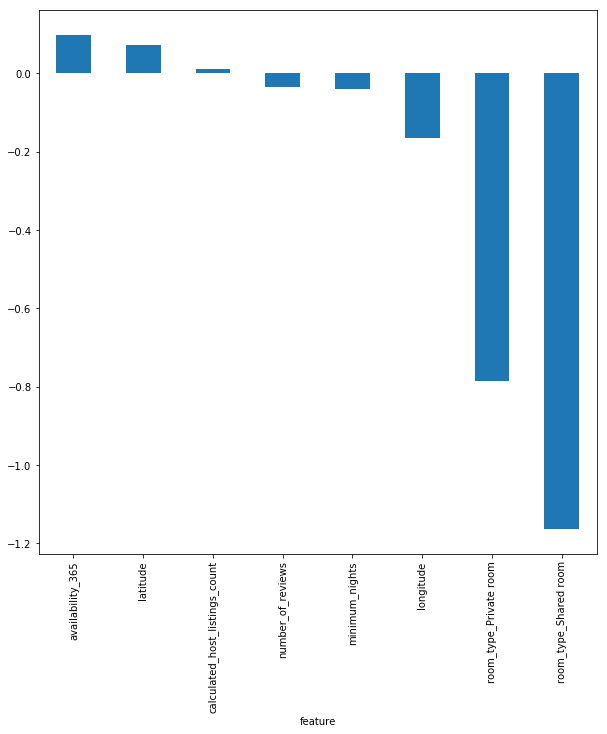

In [38]:
featureImportance = pd.DataFrame({"feature": data_frame.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 10));

In [39]:
print_metrics(y_test,y_pred_lasso)

MAE: 64.50645535696195
RMSE: 226.60226679244937
R2: 0.46182632871156226
MAPE: 7.879504672090161


In [40]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(cv=5)
lasso_cv_model.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv_model.alpha_)

y_pred_lasso_cv = lasso_cv_model.predict(X_test)

Лучшее значение параметра: 0.00022839530438483282


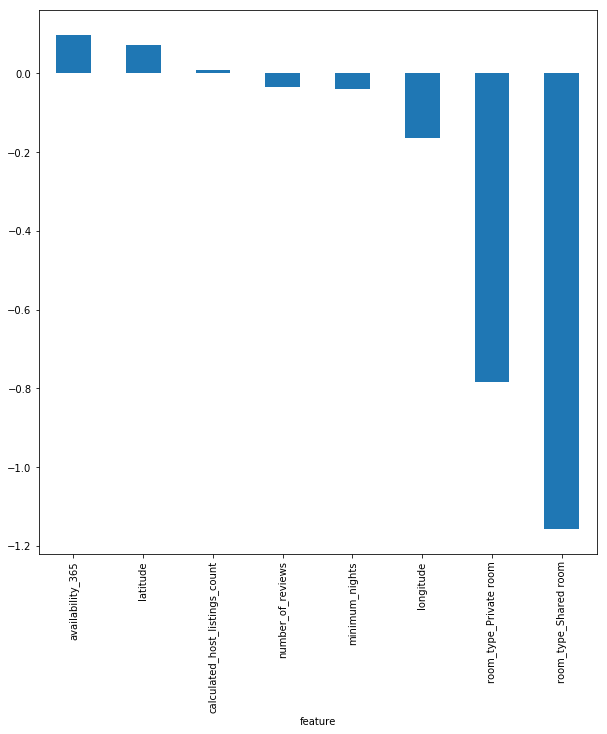

In [41]:
featureImportance = pd.DataFrame({"feature": data_frame.drop('price',axis=1).columns, 
                                  "importance": lasso_cv_model.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 10));

In [42]:
print_metrics(y_test,y_pred_lasso_cv)

MAE: 64.50468869364792
RMSE: 226.61460461143244
R2: 0.46182896736107815
MAPE: 7.879696807772604


In [43]:
from sklearn.linear_model import ElasticNetCV

elastic_cv_model = LassoCV(cv=5)
elastic_cv_model.fit(X_train, y_train)
print('Лучшие значения параметров:', elastic_cv_model.alpha_,  elastic_cv_model.intercept_)

y_pred_elastic_cv = elastic_cv_model.predict(X_test)

Лучшие значения параметров: 0.00022839530438483282 5.1104045051464135


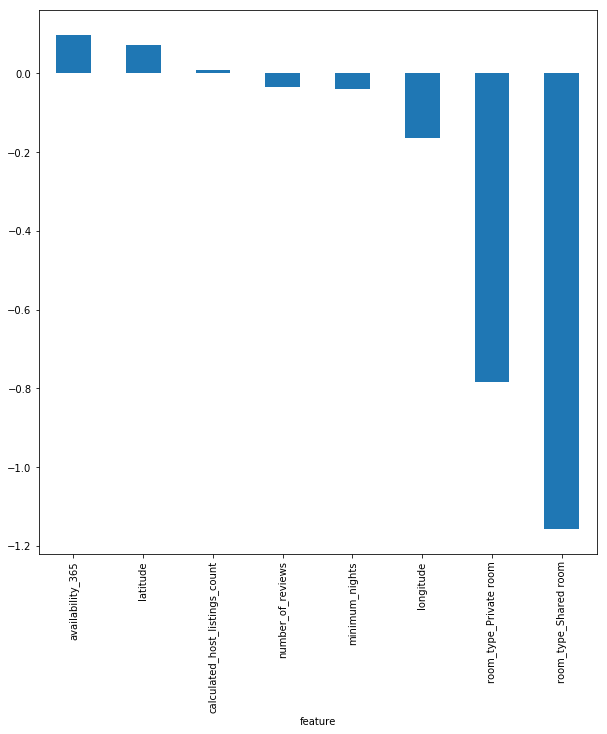

In [44]:
featureImportance = pd.DataFrame({"feature": data_frame.drop('price',axis=1).columns, 
                                  "importance": elastic_cv_model.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 10));

In [45]:
print_metrics(y_test,y_pred_elastic_cv)

MAE: 64.50468869364792
RMSE: 226.61460461143244
R2: 0.46182896736107815
MAPE: 7.879696807772604


___
# Все модели регуляризации дали один и тот же результат.   
# Однозначно можно утверждать, что "лишних" параметров в наборе данных не осталось. Видимо, найден предел точности линейной регрессии применительно к нашему набору. 
___

In [46]:
def grad_to_rad(grad_value):
    return grad_value * np.pi / 180

def geographic_distance(long_1, lat_1, long_2, lat_2):
    fi_a = grad_to_rad(lat_1)
    fi_b = grad_to_rad(lat_2)
    lambda_a = grad_to_rad(long_1)
    lambda_b = grad_to_rad(long_2)
    #d = np.arcsin(np.sin(fi_b - fi_a)**2 + np.cos(fi_a)*np.cos(fi_b)*np.sin(lambda_b - lambda_a))
    #R = 6371
    rad = 6372.795
     
    #косинусы и синусы широт и разницы долгот
    cl1 = np.cos(fi_a)
    cl2 = np.cos(fi_b)
    sl1 = np.sin(fi_a)
    sl2 = np.sin(fi_b)
    delta = lambda_b - lambda_a
    cdelta = np.cos(delta)
    sdelta = np.sin(delta)
 
     #вычисления длины большого круга
    y = np.sqrt(np.power(cl2*sdelta,2)+np.power(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = np.arctan2(y,x)
    dist = ad*rad
    return dist

___
# Замена географических координат на расстояние от центра Нью-Йорка
___

In [47]:
data_frame['distance_to_center'] = np.abs(geographic_distance(data_frame['longitude'], data_frame['latitude'], -74.00597, 40.71427))

In [48]:
data_frame = data_frame.drop(['longitude'], axis=1)
data_frame = data_frame.drop(['latitude'], axis=1)
data_frame.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,distance_to_center
0,5.003946,1,9,6,365,1,0,7.950017
1,5.416100,1,45,2,355,0,0,4.759915
2,5.010635,3,0,1,365,1,0,11.840553
3,4.488636,1,270,1,194,0,0,5.067703
4,4.382027,10,9,1,0,0,0,10.726629


In [49]:
train_data, test_data = train_test_split(data_frame, test_size = 0.3)
scaler.fit(train_data[['distance_to_center', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
scaled_train_data = scaler.transform(train_data[['distance_to_center', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])
scaled_test_data = scaler.transform(test_data[['distance_to_center', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])

In [51]:
train_data[['distance_to_center', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = scaled_train_data
test_data[['distance_to_center', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = scaled_test_data

In [52]:
y_train = train_data.price 
y_test = test_data.price 

X_train = train_data.drop('price', axis=1).get_values()
X_test = test_data.drop('price', axis=1).get_values()

In [53]:
simple_model.fit(X_train, y_train)
y_pred_simple = simple_model.predict(X_test)

In [54]:
print_metrics(y_test,y_pred_simple)

MAE: 62.8873584122802
RMSE: 192.8492073132818
R2: 0.4568629343029631
MAPE: 7.953247337992947


___
# Замена координат на расстояние до центра города повысила точность регрессии простой модели без регуляризации
___

In [55]:
elastic_cv_model.fit(X_train, y_train)
print('Лучшие значения параметров:', elastic_cv_model.alpha_,  elastic_cv_model.intercept_)

y_pred_elastic_cv = elastic_cv_model.predict(X_test)

Лучшие значения параметров: 0.0002388354937457075 5.1088023384683705


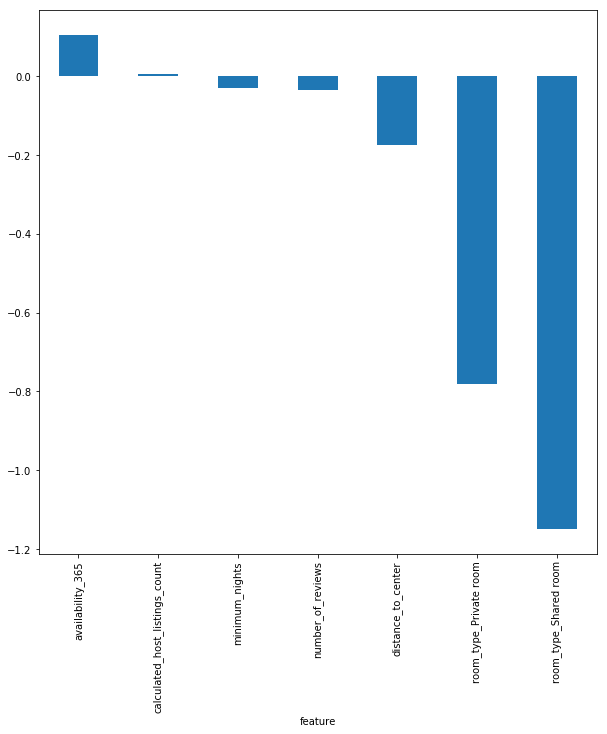

In [56]:
featureImportance = pd.DataFrame({"feature": data_frame.drop('price',axis=1).columns, 
                                  "importance": elastic_cv_model.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 10));

In [57]:
print_metrics(y_test,y_pred_elastic_cv)

MAE: 62.88254768085901
RMSE: 192.87274725827254
R2: 0.4568580031365821
MAPE: 7.952864388950857


___
# На модель с регуляризацией замена координат на расстояние от центра почти не повлияли, метрики даже стали несколько хуже.   
# Значимость параметров так же не изменилось: доступность для аренды и близость к центру - два основных параметра, повышающие цену.
___